# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [1]:
# from dolphin.processor import Processor

# processor = Processor('../io_directory_example/')

### Run a model by calling the  `swim()` method

In [2]:
# processor.swim(lens_name='DESJ0537-4647', model_id='example', log=False)

## Let's check the output

In [3]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

-1.1925066377192441 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1925066377192435


/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


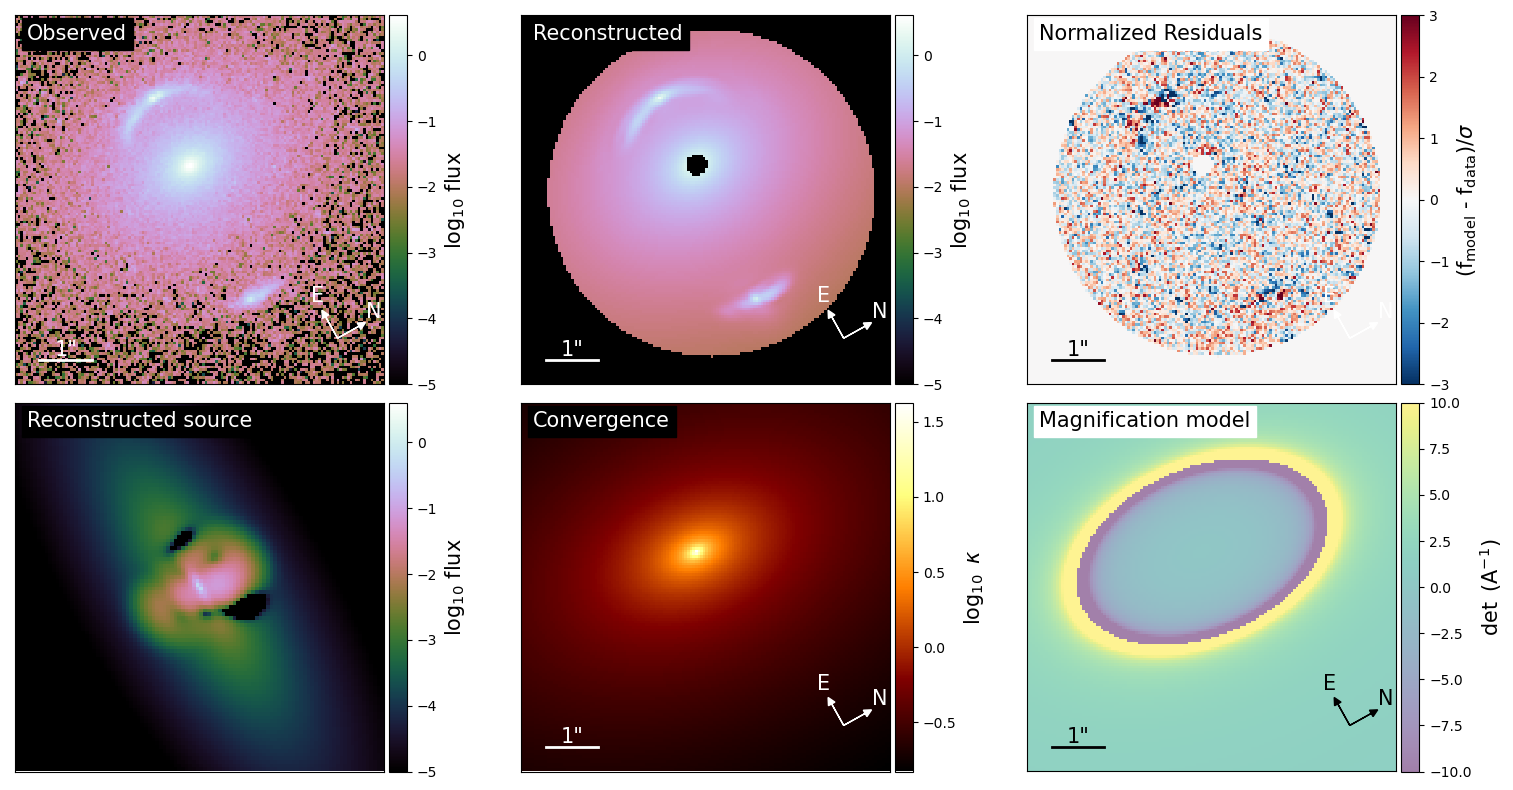

In [11]:
fig = output.plot_model_overview(lens_name='DESJ0537-4647', model_id='AllFilters_Run01', band_index=0)

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [8]:
output.load_output(lens_name='DESJ0537-4647', model_id='AllFilters_Run01')

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.9970149305276057,
   'gamma': 2.0,
   'e1': -0.21572109591078098,
   'e2': -0.044400237406069826,
   'center_x': 0.0026499178502409643,
   'center_y': 0.00752008021958993},
  {'gamma_ext': 0.001, 'psi_ext': 0.0, 'ra_0': 0, 'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 6,
   'beta': 0.08330060814941243,
   'center_x': -0.6589078189225902,
   'center_y': -0.04681142975487934},
  {'amp': 1,
   'R_sersic': 0.06894634125146872,
   'n_sersic': 4.0,
   'e1': 0.47080149680430794,
   'e2': -0.0182862574252531,
   'center_x': -0.6589078189225902,
   'center_y': -0.04681142975487934},
  {'amp': 1,
   'n_max': 6,
   'beta': 0.06488309437761612,
   'center_x': -0.6768109327903334,
   'center_y': 0.010771453518165759},
  {'amp': 1,
   'R_sersic': 0.4999508859492505,
   'n_sersic': 0.5221564451202663,
   'e1': -0.35987575450754455,
   'e2': -0.1287281139750442,
   'center_x': 0.014403463281799537,
   'center_y': 0.1508269123645893}],
 'kwargs_lens_light': [{'a

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [9]:
output.model_settings

{'band': ['F200LP', 'F140W'],
 'fitting': {'mcmc_settings': {'burnin_step': 0,
   'iteration_step': 2000,
   'walker_ratio': 16},
  'psf_iteration': False,
  'psf_iteration_settings': {'block_neighbor': 0.0,
   'psf_iteration_factor': 0.5,
   'psf_iteration_num': 50,
   'psf_symmetry': 4},
  'pso': True,
  'pso_settings': {'num_iteration': 248, 'num_particle': 250},
  'sampler': 'MCMC',
  'sampling': False},
 'guess_params': {'lens': {'0': {'theta_E': 1.9965223041493796},
   '1': {'theta_E': 1.993402210977581}}},
 'kwargs_constraints': {'joint_lens_light_with_lens_light': [[0,
    1,
    ['e1', 'e2', 'center_x', 'center_y']]],
  'joint_lens_with_light': [[0, 0, ['center_x', 'center_y']]],
  'joint_source_with_source': [[0, 1, ['center_x', 'center_y']]]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0},
   '1': {'n_sersic': 1.0}}},
 'lens_option': {'centroid_init': [0.0, 0.0],
  'constrain_position_angle_from_lens_light': 15},
 'mask': {'centroid_offset': [[0.045499999999999985, 0

In [10]:
output.get_kwargs_data_joint('DESJ0537-4647')['multi_band_list']

[[{'background_rms': 0.01582284271717,
   'dec_at_xy_0': -4.763034574700551,
   'dec_shift': -0.1236,
   'exposure_time': array([[941.8939 , 954.79254, 973.9274 , ..., 955.2696 , 976.8277 ,
           959.6794 ],
          [928.7961 , 952.2035 , 977.06976, ..., 857.5787 , 936.99634,
           958.3874 ],
          [918.14246, 932.019  , 955.2233 , ..., 709.41705, 862.7461 ,
           937.60394],
          ...,
          [946.23755, 674.46704, 541.85596, ..., 980.1515 , 963.0934 ,
           935.1315 ],
          [923.2193 , 518.172  , 960.0542 , ..., 928.0333 , 955.259  ,
           939.52985],
          [916.82874, 617.32837, 944.83673, ..., 762.90344, 936.63837,
           922.21814]], dtype=float32),
   'image_data': array([[-0.00701739,  0.02902501,  0.00562186, ...,  0.00285046,
            0.00609897, -0.0351053 ],
          [-0.01399766,  0.01347269,  0.00727754, ...,  0.03280794,
           -0.00635926,  0.00787584],
          [-0.02530972, -0.00883991, -0.00186693, ...,  0.0

{'image_data': array([[-0.00701739,  0.02902501,  0.00562186, ...,  0.00285046,
          0.00609897, -0.0351053 ],
        [-0.01399766,  0.01347269,  0.00727754, ...,  0.03280794,
         -0.00635926,  0.00787584],
        [-0.02530972, -0.00883991, -0.00186693, ...,  0.01753028,
         -0.00351646, -0.00312745],
        ...,
        [ 0.00675939, -0.00314758,  0.02323889, ...,  0.01046215,
         -0.01443514,  0.01564207],
        [ 0.02211787,  0.01164866,  0.00086476, ..., -0.00031013,
          0.00307657,  0.03531567],
        [-0.00357417,  0.00728699, -0.01729343, ...,  0.02290454,
          0.00690911,  0.02006145]], dtype=float32),
 'background_rms': 0.01582284271717,
 'noise_map': None,
 'exposure_time': array([[941.8939 , 954.79254, 973.9274 , ..., 955.2696 , 976.8277 ,
         959.6794 ],
        [928.7961 , 952.2035 , 977.06976, ..., 857.5787 , 936.99634,
         958.3874 ],
        [918.14246, 932.019  , 955.2233 , ..., 709.41705, 862.7461 ,
         937.60394],
        ...,
        [946.23755, 674.46704, 541.85596, ..., 980.1515 , 963.0934 ,
         935.1315 ],
        [923.2193 , 518.172  , 960.0542 , ..., 928.0333 , 955.259  ,
         939.52985],
        [916.82874, 617.32837, 944.83673, ..., 762.90344, 936.63837,
         922.21814]], dtype=float32),
 'ra_at_xy_0': -1.3508120373124508,
 'dec_at_xy_0': -4.763034574700551,
 'transform_pix2angle': array([[-0.0243686 ,  0.04366592],
        [ 0.04368588,  0.02435747]]),
 'ra_shift': 0.6455,
 'dec_shift': 0.1236}